In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [4]:
df = pd.read_csv('/Users/robertkammerer/Ironhack/05_Week/AccidentAtlasGermany/TrafficAccidentData_2018-2020_new.csv')

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,id,land,bezirk,kreis,gemeinde,jahr,monat,stunde,wochentag,kategorie,art,typ,lichtverhältnis,fahrrad,pkw,fußgänger,motorrad,lkw,sonstige,straßenzustand,linrefx,linrefy,xgcswgs84,ygcswgs84,id_dist,combinations
0,1,Schleswig-Holstein,0,3,0,2018,1,8,thursday,seriously injured,Other,Other,daylight,1,0,0,0,0,0,dry,"612054,341999999950000","5969634,006000000100000","10,703950299000041","53,863081147000059",1_2018,fahrrad
1,2,Schleswig-Holstein,0,62,20,2018,1,15,friday,slightly injured,Collision with another vehicle which turns int...,Accident caused by turning off the road,daylight,0,1,0,0,0,0,wet,"592301,984999999990000","5938800,026999999800000","10,394496814000036","53,589905976000068",2_2018,pkw
2,3,Schleswig-Holstein,0,56,15,2018,1,19,wednesday,slightly injured,Collision with another vehicle moving ahead or...,Accident between vehicles moving along in carr...,darkness,0,1,0,0,0,0,wet,"547114,933199999970000","5955266,091099999800000","9,714396363000049","53,743906875000050",3_2018,pkw
3,4,Schleswig-Holstein,0,59,37,2018,1,10,thursday,slightly injured,Collision with another vehicle which turns int...,Accident caused by turning into a road or by c...,daylight,0,1,0,0,0,0,wet,"534122,484399999960000","6054521,118599999700000","9,528665857000021","54,636949491000053",4_2018,pkw
4,5,Schleswig-Holstein,0,58,150,2018,1,13,tuesday,slightly injured,Collision with another vehicle which turns int...,Accident caused by turning off the road,daylight,0,1,0,0,0,0,dry,"572287,658999999990000","6037455,893000000200000","10,115679928000077","54,479588354000043",5_2018,pkw


In [6]:
m = folium.Map(location=[52.5200, 13.4050])
m

locations = df[['id_dist', 'xgcswgs84', 'ygcswgs84']]

locations.dtypes

locations['xgcswgs84']=locations['xgcswgs84'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
locations['ygcswgs84']=locations['ygcswgs84'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)

locations.head()

for index, location_info in locations.iterrows():
    folium.Marker([location_info["xgcswgs84"], location_info["ygcswgs84"]]).add_to(m)

In [7]:
df_plot=df.drop(['id','bezirk','kreis','gemeinde', 'linrefx','linrefy','id_dist','ygcswgs84','xgcswgs84'],axis=1)

df_plot.head()

def plot_all(df): for col in df.columns: plt.figure() sns.countplot(y=df[col])

#plot_all(df)  -> too much for my computer...

,land,jahr,monat,stunde,wochentag,kategorie,art,typ,lichtverhältnis,fahrrad,pkw,fußgänger,motorrad,lkw,sonstige,straßenzustand,combinations
0,Schleswig-Holstein,2018,1,8,thursday,seriously injured,Other,Other,daylight,1,0,0,0,0,0,dry,fahrrad
1,Schleswig-Holstein,2018,1,15,friday,slightly injured,Collision with another vehicle which turns int...,Accident caused by turning off the road,daylight,0,1,0,0,0,0,wet,pkw
2,Schleswig-Holstein,2018,1,19,wednesday,slightly injured,Collision with another vehicle moving ahead or...,Accident between vehicles moving along in carr...,darkness,0,1,0,0,0,0,wet,pkw
3,Schleswig-Holstein,2018,1,10,thursday,slightly injured,Collision with another vehicle which turns int...,Accident caused by turning into a road or by c...,daylight,0,1,0,0,0,0,wet,pkw
4,Schleswig-Holstein,2018,1,13,tuesday,slightly injured,Collision with another vehicle which turns int...,Accident caused by turning off the road,daylight,0,1,0,0,0,0,dry,pkw


def plot_all(df):
    for col in df.columns:
        plt.figure()
        sns.countplot(y=df[col])

plot_all(df)


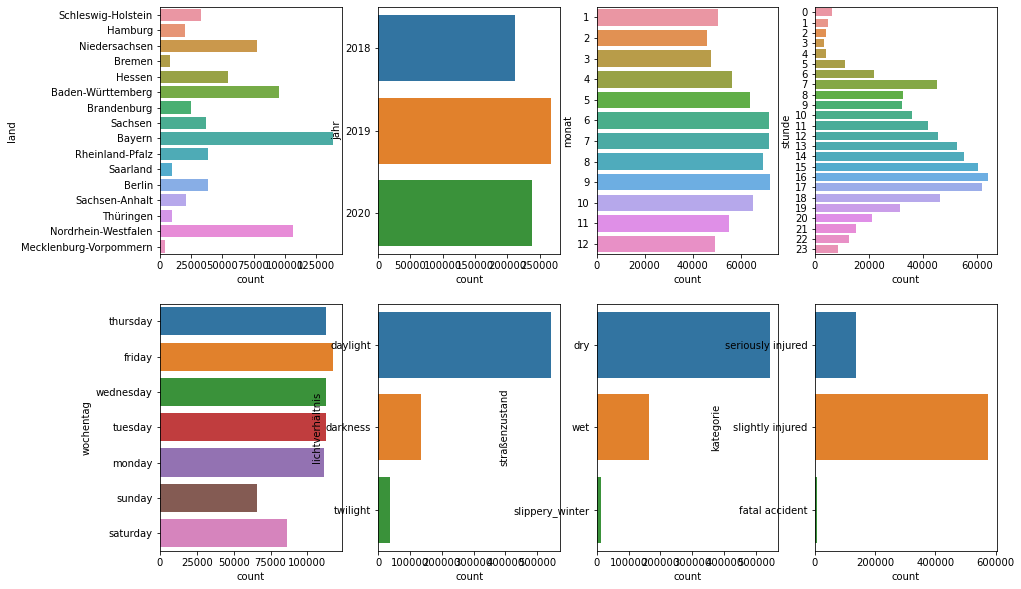

In [9]:
fig, ax = plt.subplots(2,4,figsize=(15,10))
sns.countplot(y=df['land'], ax=ax[0,0])
sns.countplot(y=df['jahr'], ax=ax[0,1])
sns.countplot(y=df['monat'], ax=ax[0,2])
sns.countplot(y=df['stunde'], ax=ax[0,3])
sns.countplot(y=df['wochentag'], ax=ax[1,0])
sns.countplot(y=df['lichtverhältnis'], ax=ax[1,1])
sns.countplot(y=df['straßenzustand'], ax=ax[1,2])
sns.countplot(y=df['kategorie'], ax=ax[1,3])
plt.show()

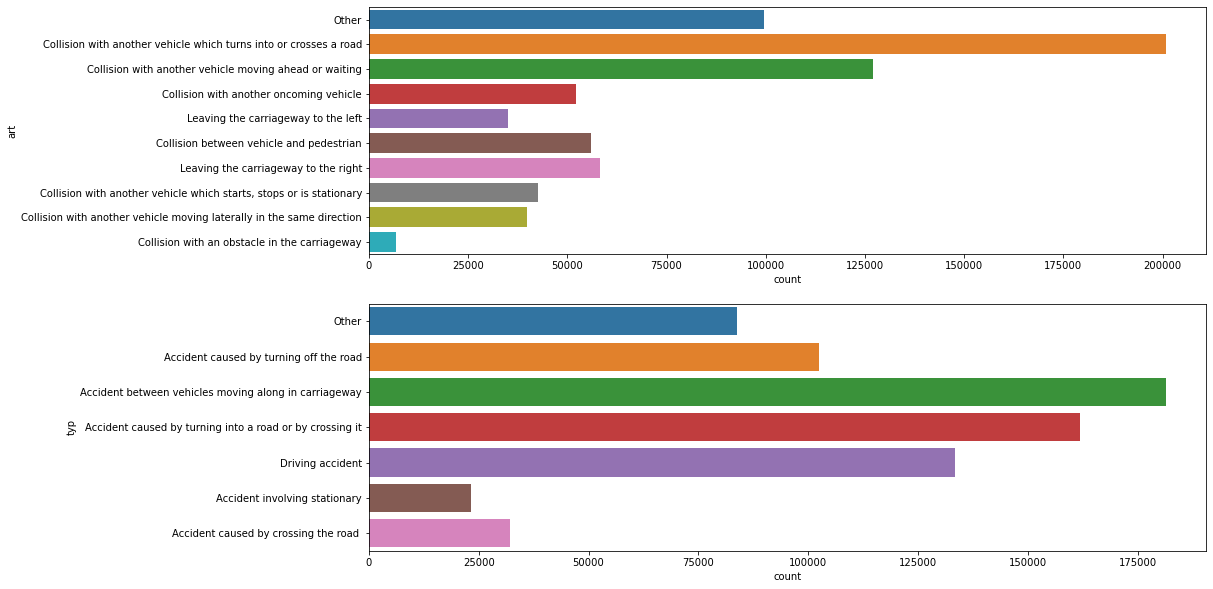

In [16]:
fig, ax = plt.subplots(2,figsize=(15,10))
sns.countplot(y=df['art'], ax=ax[0])
sns.countplot(y=df['typ'], ax=ax[1])
plt.show()

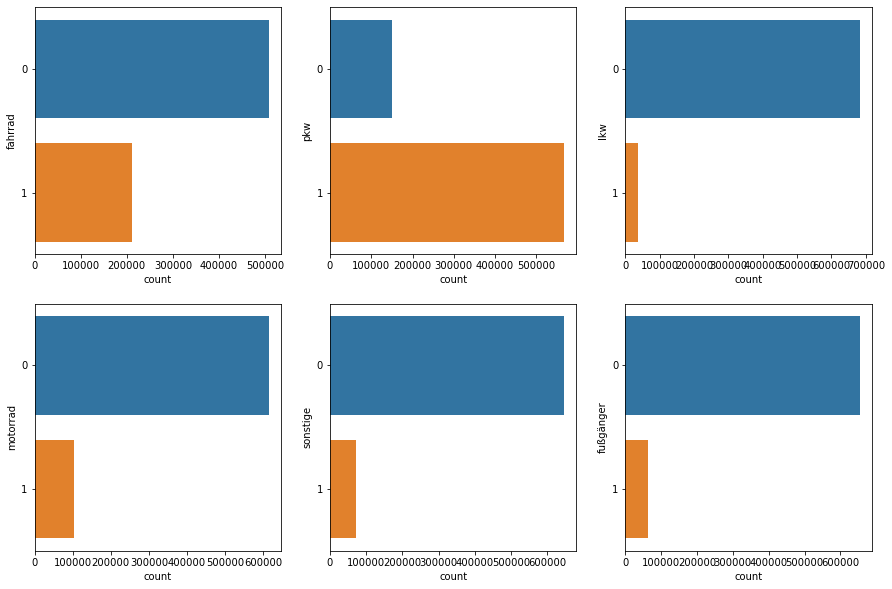

In [17]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
sns.countplot(y=df['fahrrad'], ax=ax[0,0])
sns.countplot(y=df['pkw'], ax=ax[0,1])
sns.countplot(y=df['lkw'], ax=ax[0,2])
sns.countplot(y=df['motorrad'], ax=ax[1,0])
sns.countplot(y=df['sonstige'], ax=ax[1,1])
sns.countplot(y=df['fußgänger'], ax=ax[1,2])
plt.show()

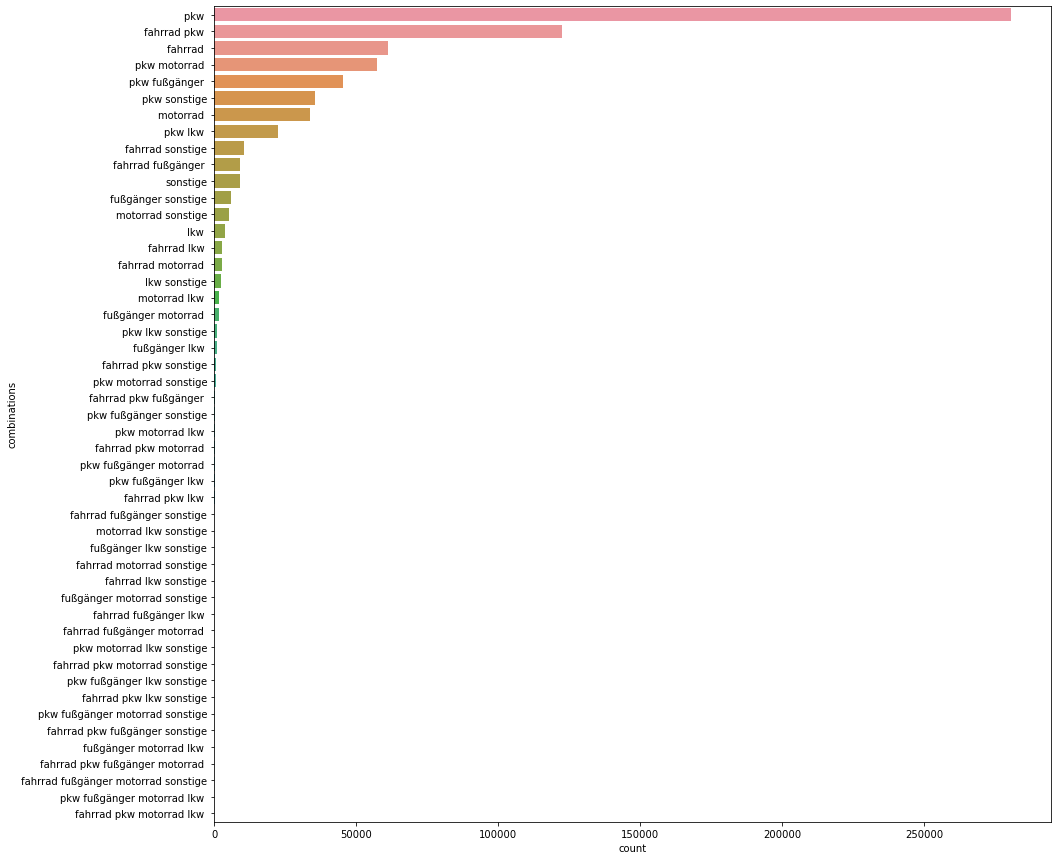

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
sns.countplot(y=df['combinations'], order=df['combinations'].value_counts().index)
plt.show()

In [38]:
# create reduced data for Berlin to have better performance

df_ber = df[df['land']=='Berlin']
df_ber.shape

(38852, 26)

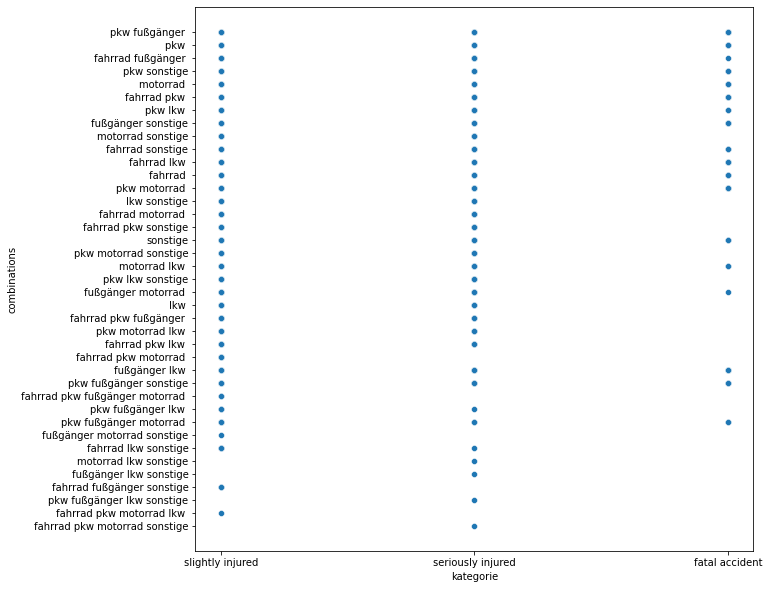

In [45]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.scatterplot(data=df_ber, x="kategorie", y="combinations")
plt.show()

In [54]:
regionen = pd.read_csv('/Users/robertkammerer/Downloads/GV100AD3101/GV100AD_310122.txt',delimiter=' ' ,on_bad_lines='skip')

/Users/robertkammerer/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (12,13,14,15,18,19,20,21,22,23,24,26,27,52,53,57,58,60,62,64,66,67,68,69,70,72,73,105,106,107,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [55]:
regionen.head()

,102022013101,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Schleswig-Holstein,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Kiel,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186
0,402022013101001,NaN,NaN,NaN,NaN,NaN,NaN,"Flensburg,",Stadt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flensburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,502022013101001,NaN,NaN,"0000Flensburg,",Stadt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"6020220131010010000000Flensburg,",Stadt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN